## Аугментация

При глубоком обучении иногда можно столкнуться с ситуацией, когда набор данных имеет ограниченный размер. Но чтобы получить лучшие результаты обобщение модели, необходимо иметь больше данных, в том числе и различные их вариации. То есть необходимо увеличить размер исходного набора искусственным образом, и это можно сделать с помощью **аугментации** данных.

**nlpaug** - nlpaug is a library for textual augmentation in machine learning experiments. The goal is improving deep learning model performance by generating textual data. It also able to generate adversarial examples to prevent adversarial attacks.

[nlpaug documentation](https://nlpaug.readthedocs.io/en/latest/index.html)

In [ ]:
!pip install nlpaug

In [ ]:
text = 'There are many tasks in NLP from text classification to question answering but whatever you do the amount of data you have to train your model impacts the model performance heavily.'

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

### Character level augmentation

In [ ]:
def get_augmented(input_text, augmenter):
  augmented_text = augmenter.augment(input_text)
  print("Original:")
  print(input_text)
  print("Augmented Text:")
  print(augmented_text)

In [ ]:
text = 'There are many tasks in NLP'

In [ ]:
get_augmented(text, nac.KeyboardAug(aug_char_p=0.1, aug_word_min=2, aug_word_max=5, include_numeric=False, include_upper_case=False, include_special_char=False),) # симуляция опечатки в символе, символ подбирается по расстоянию на клавиатуре

Original:
There are many tasks in NLP
Augmented Text:
['There are mang tazks in NLP']


In [ ]:
get_augmented(text, nac.KeyboardAug(aug_word_p=0.2, aug_word_max=5)) # симуляция опечатки в символе, символ подбирается по расстоянию на клавиатуре

Original:
There are many tasks in NLP
Augmented Text:
['There are maH7 gaskw in NLP']


In [ ]:
get_augmented(text, nac.OcrAug(aug_word_p=0.3, aug_word_max=10)) # симуляция ошибки OCR (I == 1)

Original:
There are many tasks in NLP
Augmented Text:
['There are many tasks in NLP']


In [ ]:
get_augmented(text, nac.OcrAug(aug_word_p=0.3, aug_word_max=10)) # симуляция ошибки OCR (I == 1)

Original:
There are many tasks in NLP
Augmented Text:
['There ake many tasks in NLP']


In [ ]:
get_augmented(text, nac.RandomCharAug(aug_word_p=0.2, aug_word_max=10)) # симуляция случайной опечатки

Original:
There are many tasks in NLP
Augmented Text:
['Zhe8e are many Uaskf in NLP']


### Word level augmentation

#### Замена слов по смыслу

In [ ]:
get_augmented(text, naw.AntonymAug(aug_p=0.2)) # замена по смыслу на антонимы

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Original:
There are many tasks in NLP
Augmented Text:
['There differ few tasks in NLP']


In [ ]:
get_augmented(text, naw.SynonymAug(aug_p=0.2)) # замена по смыслу на синонимы

Original:
There are many tasks in NLP
Augmented Text:
['There equal many tasks in NLP']


In [ ]:
get_augmented(text, naw.SynonymAug(aug_p=0.2)) # замена по смыслу на синонимы

Original:
There are many tasks in NLP
Augmented Text:
['There are many tasks in human language technology']


#### Операции со словами

In [ ]:
get_augmented(text, naw.SplitAug(aug_p=0.2)) # пробелы в случайных местах

Original:
There are many tasks in NLP
Augmented Text:
['There are m any tas ks in NLP']


In [ ]:
get_augmented(text, naw.RandomWordAug(action='delete', aug_p=0.2)) # убирает случайные слова. Доступные action = ‘substitute’, ‘swap’, ‘delete’

Original:
There are many tasks in NLP
Augmented Text:
['Are many tasks NLP']


In [ ]:
get_augmented(text, naw.RandomWordAug(action='substitute', aug_p=0.2))

Original:
There are many tasks in NLP
Augmented Text:
['There are many tasks _ _']


#### Back translation

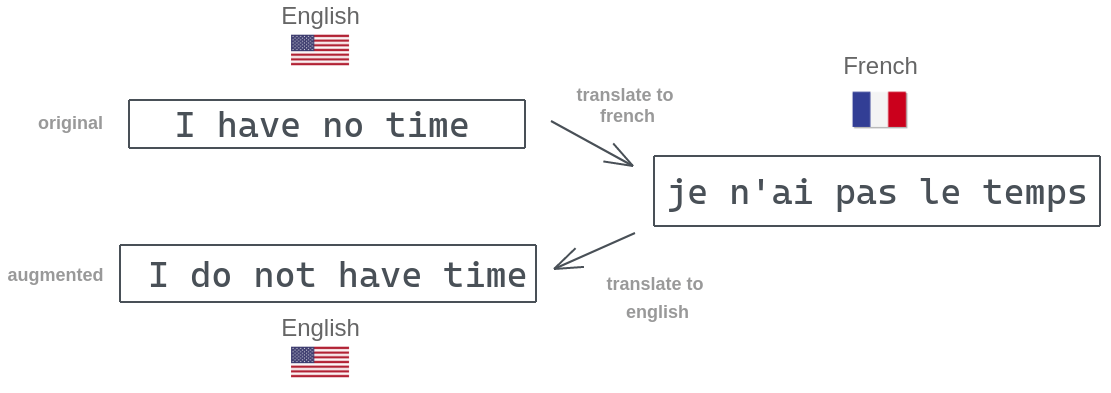

[Доступные модели](https://huggingface.co/models?search=Helsinki-NLP&pipeline_tag=translation)

In [ ]:
!pip install transformers

In [ ]:
!pip install sacremoses

In [ ]:
get_augmented(text, naw.BackTranslationAug(from_model_name='facebook/wmt19-en-de', to_model_name='facebook/wmt19-de-en')) # можно задать device

Original:
There are many tasks in NLP
Augmented Text:
['NLP has many tasks']


### Sentence level augmentation

In [ ]:
get_augmented(text, nas.ContextualWordEmbsForSentenceAug(model_path='distilgpt2'))

Original:
There are many tasks in NLP
Augmented Text:
['There are many tasks in NLP You The This " The This I The I A .']


#### Abstractive Summarization

In [ ]:
article = """
The history of natural language processing (NLP) generally started in the 1950s, although work can be
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966,
which found that ten-year-long research had failed to fulfill the expectations, funding for machine
translation was dramatically reduced. Little further research in machine translation was conducted
until the late 1980s when the first statistical machine translation systems were developed.
"""

In [ ]:
get_augmented(article, nas.AbstSummAug(model_path='t5-base')) # можно задать device

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Original:

The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced. Little further research in machine translation was conducted 
until the late 1980s when the first statistical machine translation systems were developed.

Augmented Text:
['the history of natural language processing (NLP) generally started in the 

### Tips

- Не стоит валидироваться на аугментированных данных и вообще их переоценивать
- При использовании k-fold валидации аугментированные и исходные данные должны быть в одном фолде
- Универсальной для всех случаев аугментации не существует
- Можно их миксовать
- При этом не всегда увеличение количества данных будет влиять на качество :с

## Что еще почитать?

[Data Augmentation Using Pre-trained Transformer Models](https://arxiv.org/pdf/2003.02245.pdf)

[Аугментация для текстов](https://alexanderdyakonov.wordpress.com/2020/11/09/text-augmentation/)
